In [1]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
df = pd.read_csv("resources/wine-quality-white-and-red.csv")
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df["target"] = pd.get_dummies(df.type, drop_first=True)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<AxesSubplot:>

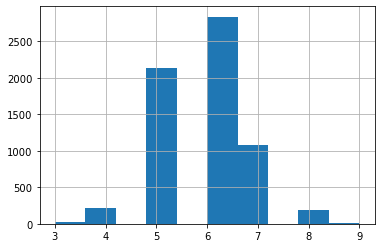

In [5]:
df["quality"].hist()

In [6]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [7]:
df.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [8]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'target'],
      dtype='object')

In [9]:
cols = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]

for col in cols:
    print(col)
    print(df[col].value_counts())
    print()

type
white    4898
red      1599
Name: type, dtype: int64

fixed acidity
6.80     354
6.60     327
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: fixed acidity, Length: 106, dtype: int64

volatile acidity
0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: volatile acidity, Length: 187, dtype: int64

citric acid
0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.66      1
1.23      1
0.99      1
0.88      1
0.75      1
Name: citric acid, Length: 89, dtype: int64

residual sugar
2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
12.05      1
6.95       1
9.55       1
20.15      1
3.45       1
Name: residual sugar, Length: 316, dtype: int64

chlorides
0.044    206
0.036    200
0.042    187
0.046    185
0.040    182
        ... 
0.610      1
0.290      1
0.360      1
0.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
target                    -0.486740         -0.653036     0.187397   

                   

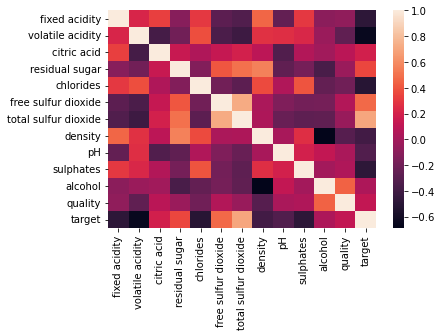

In [10]:
# check correlations
corrs = df.corr()
print(corrs)
print()
sns.heatmap(corrs)
plt.show()

In [11]:
 abs(df.corr()["quality"]).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
target                  0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [12]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']
X = df.loc[:, features].values
y = df.loc[:, ["quality"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.8 : 0.2


In [13]:
 # recipe
lr = LogisticRegression(max_iter=10000) # init
lr.fit(X_train, y_train) # fit

train_preds = lr.predict(X_train) # predict
test_preds = lr.predict(X_test)
test_proba = lr.predict_proba(X_test)

C:\Users\matt1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
 print(test_preds[0:10])
print()
print(test_proba[0:10]) 

[6 6 6 5 6 6 5 6 6 6]

[[1.72814368e-03 4.49350441e-03 1.36154380e-01 5.92289477e-01
  2.44488351e-01 1.97568940e-02 1.08924997e-03]
 [5.34106179e-03 1.06855621e-02 2.75042929e-01 5.31114769e-01
  1.42224344e-01 3.52055943e-02 3.85739879e-04]
 [6.38211359e-03 1.36786497e-02 4.36409277e-01 4.71495763e-01
  6.07026323e-02 1.10452946e-02 2.86269212e-04]
 [2.08056877e-03 6.52812717e-02 8.12036027e-01 1.14693056e-01
  4.86740841e-03 9.34195158e-04 1.07473584e-04]
 [3.08572798e-03 6.24564657e-03 4.44477381e-01 4.47348434e-01
  7.59321927e-02 2.25884321e-02 3.22186285e-04]
 [4.68679980e-03 8.98873943e-03 3.86357124e-01 5.00200516e-01
  8.28238396e-02 1.60960799e-02 8.46901463e-04]
 [5.79537097e-03 4.38189025e-02 5.76409490e-01 3.36368590e-01
  3.52667645e-02 2.01848160e-03 3.22400328e-04]
 [9.43259698e-03 2.06292178e-02 3.66454395e-01 4.88243879e-01
  1.04009094e-01 1.04030749e-02 8.27741990e-04]
 [6.72867092e-03 5.88564932e-03 1.51636450e-01 5.36943760e-01
  2.68154697e-01 2.95851308e-02 1.0

In [15]:
output = f"""
METRICS FOR THE TRAINING SET:
----------------------------
{confusion_matrix(y_train, train_preds)}

{classification_report(y_train, train_preds)}
"""
print(output)

#################################################

output = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(output)


METRICS FOR THE TRAINING SET:
----------------------------
[[   0    1   13   10    0    0    0]
 [   0    2  104   66    1    0    0]
 [   0    3 1012  686    9    0    0]
 [   0    0  496 1658  115    0    0]
 [   0    0   51  653  159    0    0]
 [   0    0   13  104   37    0    0]
 [   0    0    0    1    3    0    0]]

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        24
           4       0.33      0.01      0.02       173
           5       0.60      0.59      0.60      1710
           6       0.52      0.73      0.61      2269
           7       0.49      0.18      0.27       863
           8       0.00      0.00      0.00       154
           9       0.00      0.00      0.00         4

    accuracy                           0.54      5197
   macro avg       0.28      0.22      0.21      5197
weighted avg       0.52      0.54      0.51      5197



METRICS FOR THE TESTING SET:
----------------------------
[[  0   0   2  

C:\Users\matt1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matt1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matt1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matt1\anaconda3\lib\site-packages\sklearn\metr

In [16]:
sum((y_test - test_proba[:,1])**2)

44533.53539799701

In [17]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}
    

    """
    sns.heatmap(confusion_matrix(y_test, test_preds)/len(y_test))
    plt.show()
    print(output_test)
    print()
    
    #################################################
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))
    
    #################################################
    
    print("Accuracy on Training:")
    print(accuracy_score(y_train, train_preds))
    print("Accuracy on Testing:")
    print(accuracy_score(y_test, test_preds))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[   0    1   13   10    0    0    0]
 [   0    2  104   66    1    0    0]
 [   0    3 1008  690    9    0    0]
 [   0    0  498 1655  116    0    0]
 [   0    0   53  644  166    0    0]
 [   0    0   13  104   37    0    0]
 [   0    0    0    1    3    0    0]]

    


C:\Users\matt1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


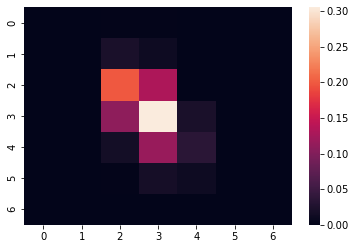


    METRICS FOR THE TESTING SET:
    ----------------------------
    [[  0   0   2   3   0   1   0]
 [  0   1  27  14   1   0   0]
 [  0   0 258 170   0   0   0]
 [  0   0 142 397  27   1   0]
 [  0   0  21 151  44   0   0]
 [  0   0   3  22  14   0   0]
 [  0   0   0   0   1   0   0]]
    

    

Brier Score:
44533.07110815939
Accuracy on Training:
0.5447373484702713
Accuracy on Testing:
0.5384615384615384


In [18]:
lr = LogisticRegression(max_iter=30000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[   0    1   12   11    0    0    0]
 [   0    9   99   60    5    0    0]
 [   0    4 1002  648   52    4    0]
 [   0    2  595 1548  118    6    0]
 [   0    1  152  495  215    0    0]
 [   0    0   26   99   22    7    0]
 [   0    0    0    3    1    0    0]]

    


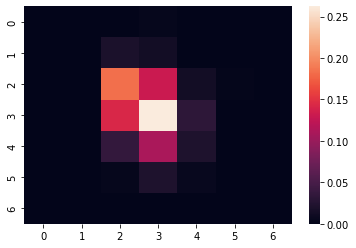


    METRICS FOR THE TESTING SET:
    ----------------------------
    [[  0   0   1   5   0   0   0]
 [  0   0  25  17   1   0   0]
 [  0   0 238 170  17   3   0]
 [  0   1 184 341  40   1   0]
 [  0   0  46 143  27   0   0]
 [  0   0   4  27   7   1   0]
 [  0   0   0   1   0   0   0]]
    

    

Brier Score:
44571.58131487873
Accuracy on Training:
0.5351164133153743
Accuracy on Testing:
0.46692307692307694


In [19]:
knn_model = KNeighborsClassifier(n_neighbors=17)

evaluateModel(knn_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[   0    0    3   21    0    0    0]
 [   0    0    4  169    0    0    0]
 [   0    0   37 1673    0    0    0]
 [   0    0   28 2241    0    0    0]
 [   0    0    2  861    0    0    0]
 [   0    0    0  154    0    0    0]
 [   0    0    0    4    0    0    0]]

    


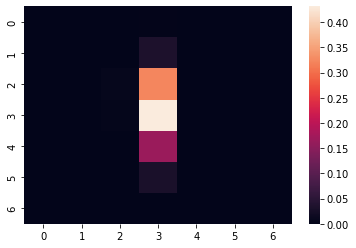


    METRICS FOR THE TESTING SET:
    ----------------------------
    [[  0   0   2   4   0   0   0]
 [  0   0   0  43   0   0   0]
 [  0   0   8 420   0   0   0]
 [  0   0   6 561   0   0   0]
 [  0   0   0 216   0   0   0]
 [  0   0   0  39   0   0   0]
 [  0   0   0   1   0   0   0]]
    

    

Brier Score:
44512.297175154265
Accuracy on Training:
0.4383298056571099
Accuracy on Testing:
0.4376923076923077


In [20]:
svm_model = SVC(probability=True)

evaluateModel(svm_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[  24    0    0    0    0    0    0]
 [   0  173    0    0    0    0    0]
 [   0    0 1710    0    0    0    0]
 [   0    0    0 2269    0    0    0]
 [   0    0    0    0  863    0    0]
 [   0    0    0    0    0  154    0]
 [   0    0    0    0    0    0    4]]

    


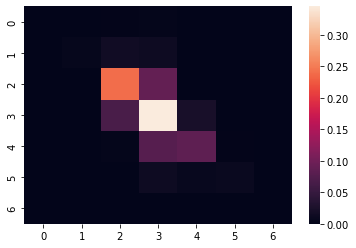


    METRICS FOR THE TESTING SET:
    ----------------------------
    [[  0   0   2   4   0   0   0]
 [  0   6  21  16   0   0   0]
 [  0   1 312 115   0   0   0]
 [  0   1  87 449  29   1   0]
 [  0   0   4 100 110   2   0]
 [  0   0   1  16  10  12   0]
 [  0   0   0   1   0   0   0]]
    

    

Brier Score:
44595.39699999997
Accuracy on Training:
1.0
Accuracy on Testing:
0.6838461538461539


In [21]:
rf = RandomForestClassifier()

evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[  24    0    0    0    0    0    0]
 [   0  173    0    0    0    0    0]
 [   0    0 1625   82    3    0    0]
 [   0    0   65 2196    8    0    0]
 [   0    0    3   45  815    0    0]
 [   0    0    0    0    0  154    0]
 [   0    0    0    0    0    0    4]]

    


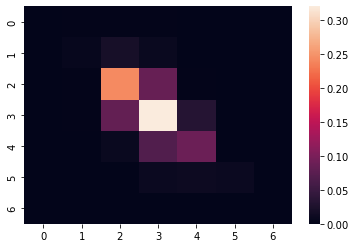


    METRICS FOR THE TESTING SET:
    ----------------------------
    [[  0   2   2   2   0   0   0]
 [  0   7  25  10   1   0   0]
 [  0   2 314 109   3   0   0]
 [  0   2 106 416  42   1   0]
 [  0   1  10  89 115   1   0]
 [  0   0   0  12  14  12   1]
 [  0   0   0   1   0   0   0]]
    

    

Brier Score:
44816.011014065065
Accuracy on Training:
0.9603617471618241
Accuracy on Testing:
0.6646153846153846


In [22]:
lgb = LGBMClassifier()

evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [23]:
from sklearn.ensemble import AdaBoostClassifier


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[   8    0   10    6    0    0    0]
 [  71    0   62   40    0    0    0]
 [ 403    0  935  363    9    0    0]
 [ 368    0  737 1146   18    0    0]
 [ 122    0  117  602   21    0    1]
 [  10    0   19  122    2    0    1]
 [   0    0    0    2    2    0    0]]

    


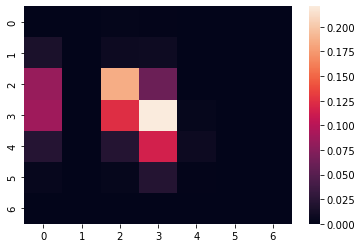


    METRICS FOR THE TESTING SET:
    ----------------------------
    [[  1   0   3   2   0   0   0]
 [ 21   0  10  11   1   0   0]
 [108   0 240  79   1   0   0]
 [114   0 161 287   4   0   1]
 [ 29   0  28 150   9   0   0]
 [  5   0   4  28   2   0   0]
 [  0   0   0   1   0   0   0]]
    

    

Brier Score:
43046.53675593479
Accuracy on Training:
0.4060034635366558
Accuracy on Testing:
0.41307692307692306


In [24]:
ada = AdaBoostClassifier(random_state=42)

evaluateModel(ada, X_train, X_test, y_train, y_test)

In [25]:
sorted(list(zip(rf.feature_importances_, features)))

[(0.004129757634624175, 'target'),
 (0.07372049967208627, 'fixed acidity'),
 (0.08047545983816011, 'citric acid'),
 (0.08261264210731845, 'pH'),
 (0.08512158220907519, 'residual sugar'),
 (0.08578623684724342, 'sulphates'),
 (0.08578678263081219, 'free sulfur dioxide'),
 (0.08789353577701886, 'chlorides'),
 (0.09075238252112738, 'total sulfur dioxide'),
 (0.09728910299142791, 'volatile acidity'),
 (0.1030878140255198, 'density'),
 (0.12334420374558631, 'alcohol')]

In [26]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [27]:
lr.predict([[10,1,.07,5,.05,25,115,1,3,.5,9,6]])

array([4], dtype=int64)

In [34]:
df['quality_category'] = pd.cut(df['quality'], bins=[0, 5, 10], labels=['bad', 'good'])


In [36]:
df.head(6000)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target,quality_category
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1,good
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1,good
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1,good
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,good
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,red,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5,0,bad
5996,red,8.0,0.31,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,7,0,good
5997,red,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5,0,bad
5998,red,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,6,0,good
